# とりあえず音声データの中身を見てみる

## 中身をプロット、及び再構成して中身を全部見てみる

In [49]:
import librosa
import librosa.display
import numpy as np 
import glob
import os
import matplotlib.pyplot as plt
import wavio
import IPython.display

from utils import load_spectrograms
from utils import display_audio

In [17]:
data_dir = "../data"
raw_specs, noised_specs = load_spectrograms(data_dir)

In [41]:
def plot_spectrogram(S, sr=22050, title=None, save_path=None):
    """取得したmelspectrogramをプロットしてみる
    """
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(
                        S_dB, x_axis='time',
                        y_axis='mel', sr=sr,
                        fmax=sr//2)
    plt.colorbar(format='%+2.0f dB')
    if title is not None:
        plt.title(title)
    else:
        plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()


In [50]:
def reconstruct_audio(M, sr=22050):
    audio = librosa.feature.inverse.mel_to_audio(M, sr=sr)
    return audio

def display_audio(audio, sr=22050):
    IPython.display.display(IPython.display.Audio(audio, rate=sr))
    
def save_audio(audio, path, sr=22050):
    audio /= audio.mean()
    audio *= 2**15 / audio.max()
    wavio.write(path, audio, sr, sampwidth=2)

In [45]:
audio.max(), audio.min()

(0.330182, -0.34018803)

In [ ]:
def show_and_save(specs, save_name="noised", ids=[], convert_func=lambda x: x):
    """スペクトログラムの可視化と音声の保存
    """
    os.makedirs(f"../out/{save_name}/fig", exist_ok = True)
    os.makedirs(f"../out/{save_name}/audio", exist_ok = True)
    iterator = specs.keys() if len(ids) == 0 else ids
    for idx in specs.keys():
        idx = int(idx)
        plot_spectrogram(
            specs[idx], title=f"Noised spectrogram id:{idx:03d}", save_path=f"../out/{save_name}/fig/{idx:03d}.png")
        audio = reconstruct_audio(specs[idx], sr=22050)
        audio_path = f"../out/{save_name}/audio/{idx:03d}.wav"
        save_audio(audio, audio_path, sr=22050)
        display_audio(audio, sr=22050)

## ノイズ付与された音声の再構築と、可視化をする。  

音声を聞いた感じ   

- うねりのような音が発生している
- 反響音が不自然・・？
- 背景音という感じはない
- 声そのものにノイズが混じっている感じはしない


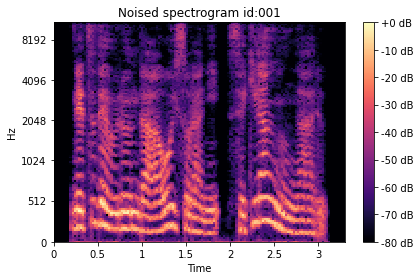

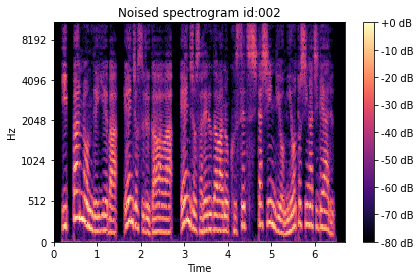

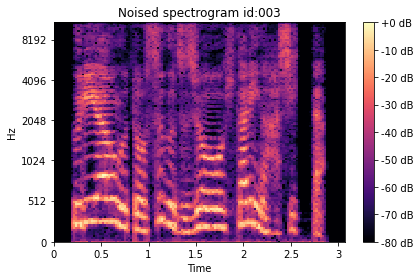

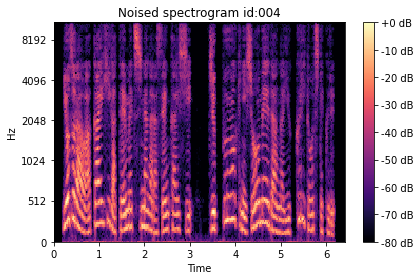

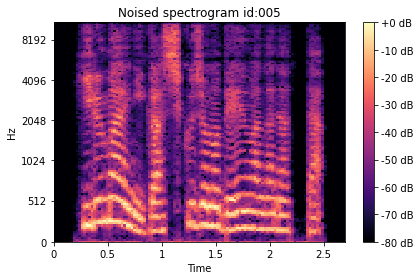

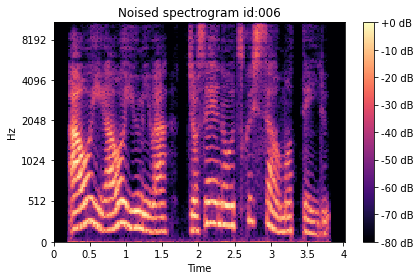

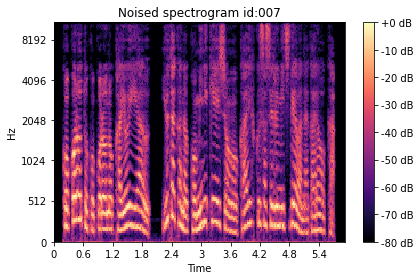

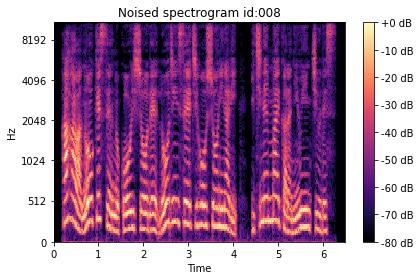

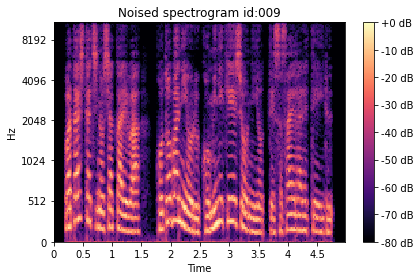

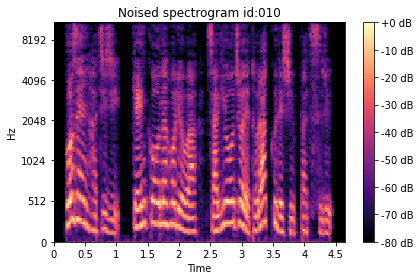

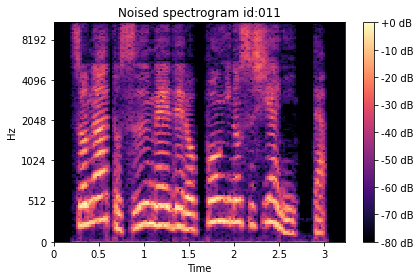

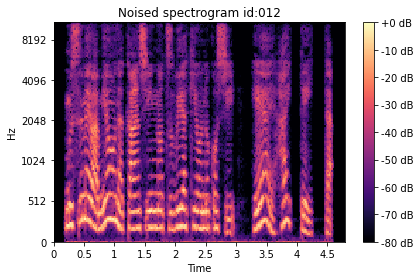

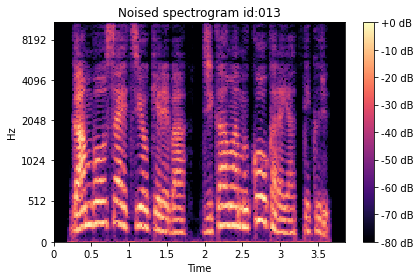

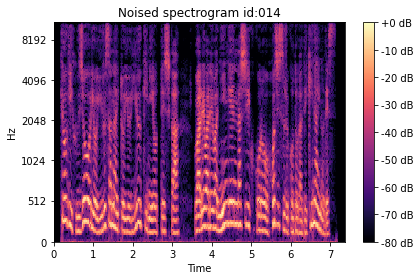

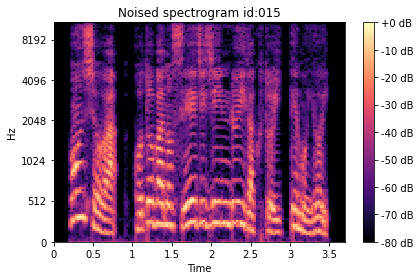

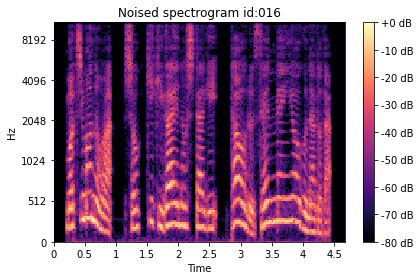

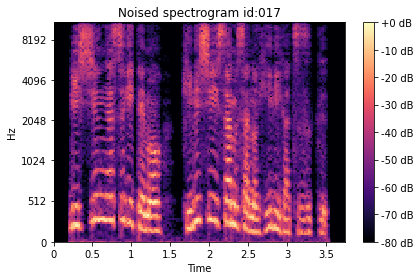

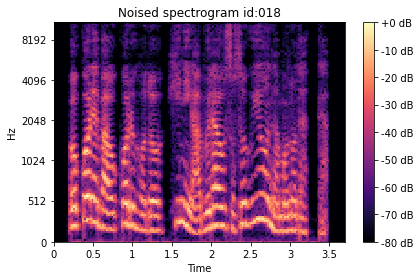

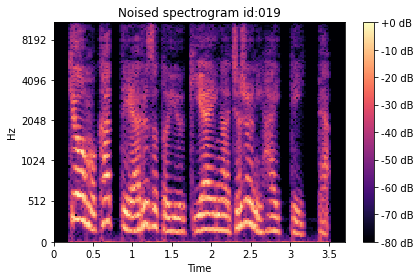

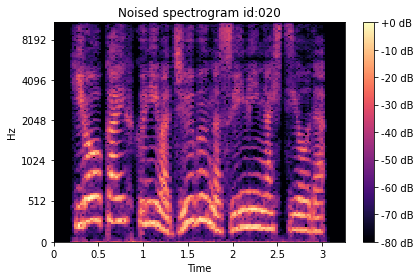

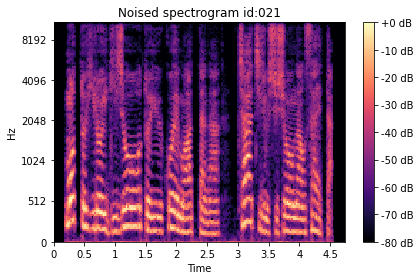

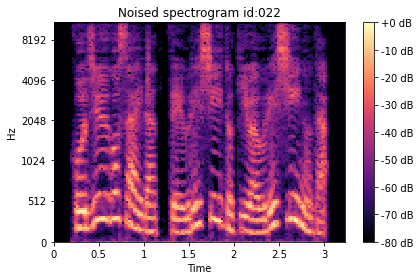

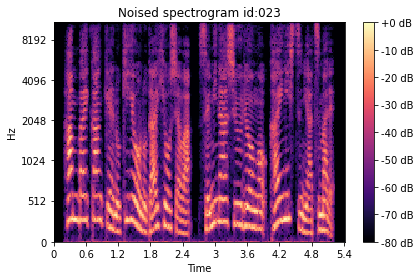

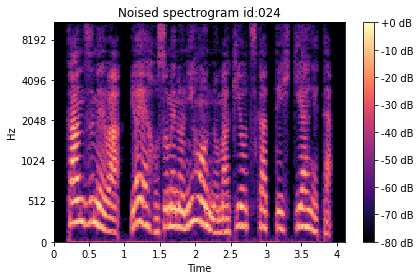

In [ ]:
for idx in noised_specs.keys():
    idx = int(idx)
    plot_spectrogram(
        noised_specs[idx], title=f"Noised spectrogram id:{idx:03d}", save_path=f"../out/noised/fig/{idx:03d}.png")
    audio = reconstruct_audio(noised_specs[idx], sr=22050)
    audio_path = f"../out/noised/audio/{idx:03d}.wav"
    save_audio(audio, audio_path, sr=22050)
    display_audio(audio, sr=22050)

In [ ]:
show_and_save(raw_specs, save_name='raw')